# Some Information About Our Dataset

## Title: Parkinsons Disease Data Set
## Abstract: Oxford Parkinson's Disease Detection Dataset

## ***Source*** 

#### The dataset was created by Max Little of the University of Oxford, in 
#### collaboration with the National Centre for Voice and Speech, Denver, 
#### Colorado, who recorded the speech signals. The original study published the 
#### feature extraction methods for general voice disorders.

> Attribute Information:

>>- MDVP:Fo(Hz)  ::: Average vocal fundamental frequency
>>- MDVP:Fhi(Hz) ::: Maximum vocal fundamental frequency
>>- MDVP:Flo(Hz) ::: Minimum vocal fundamental frequency
>>- MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP ::: Several measures of variation in fundamental frequency
>>- MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA ::: Several measures of variation in amplitude
>>- NHR, HNR ::: Two measures of ratio of noise to tonal components in the voice
>>- status ::: Health status of the subject (one) - Parkinson's & (zero) - healthy
>>- RPDE, D2 ::: Two nonlinear dynamical complexity measures
>>- DFA ::: Signal fractal scaling exponent
>>- spread1, spread2, PPE ::: Three nonlinear measures of fundamental frequency variation 

# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load
%matplotlib inline  

# Read Dataset

In [2]:
#### READ DATA ####
path = r"parkinsons.csv"
data = pd.read_csv(path)
data =data.sample(frac=1,random_state=5).reset_index(drop=True)   #Shuffling Data

In [3]:
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S20_6       98.804       102.305        87.804         0.00432   
1  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
2  phon_R01_S43_3      113.715       116.443        96.913         0.00349   
3  phon_R01_S06_5      155.358       227.383        80.055         0.00310   
4  phon_R01_S43_6      116.388       129.038       108.970         0.00346   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00004   0.00247   0.00258     0.00742       0.02223  ...   
1           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
2           0.00003   0.00171   0.00203     0.00514       0.01472  ...   
3           0.00002   0.00159   0.00176     0.00476       0.01718  ...   
4           0.00003   0.00169   0.00213     0.00507       0.01725  ...   

   Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2  \
0      0.03831  0.00882  22.244  0.576644  0.772416 -6.025367  0.078202   
1      0.02337  0.00607  24.886  0.596040  0.764112 -5.634322  0.257682   
2      0.02245  0.00478  26.547  0.380253  0.766700 -5.943501  0.192150   
3      0.02307  0.00677  25.970  0.470478  0.676258 -7.120925  0.279789   
4      0.02623  0.00415  26.143  0.361232  0.763242 -6.016891  0.109256   

         D2       PPE  status  
0  2.053601  0.177275       1  
1  1.854785  0.211756       1  
2  1.852542  0.179677       0  
3  2.241742  0.108514       1  
4  2.004719  0.174429       0  

[5 rows x 24 columns]

In [4]:
#Know Number Of Null Values
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [5]:
#Get the count of each target (0 and 1) 
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

# DEFINE DATA

In [6]:
#### define features and target ####
features=np.array( data.drop(columns=["name","status"],axis=1) ) # 22
target  =np.array( data["status"] )   # 1

print(f"Feature'shape {features.shape}")
print(f"Target'shape  {target.shape}"  )

Feature'shape (195, 22)
Target'shape  (195,)


# SHOWING DATA

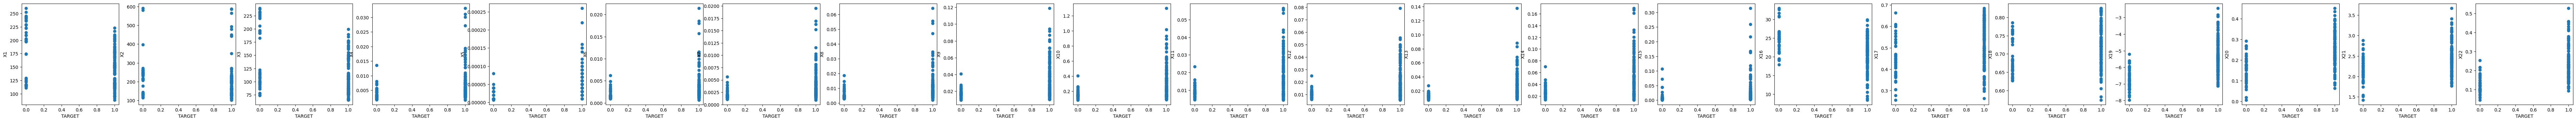

In [7]:
#### DATA SCATTER ####
fig,ax=plt.subplots(1, 22, figsize=(100, 4))

for i in range(len(ax)):
    ax[i].scatter(target,features[:,i])
    ax[i].set_ylabel(f"X{i+1}")
    ax[i].set_xlabel("TARGET")
plt.show()

# Scalling The Data  

In [8]:
### Scale/normalize the features to between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
N_features0=scaler.fit_transform(features)
N_target0=target

# **Problem 1**

> Over Fitting In

>>- Decesion Tree
>>- Support Vector Classifier

>![](3.png)

>![](2.png)

>And No Over Fitting IN
>>- Logistic Regression
>>- K Nearest Neighbor

>![](1.png)
>![](5.png)

# ----------------------------------------------------------------

# Solve Problem Of Support Vector Classifier

In [9]:
### Scale/normalize the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
N_features1=scaler.fit_transform(features)
N_target1=target

>![](6.png)

# ---------------------------------------------------------------------------------------

#### Some Data To Predict

In [10]:
Positive=[[176.858,205.56,75.344,0.00747,0.00004,0.00418,0.0042,0.01254,0.04795,0.435,0.02679,0.03022,0.0351,0.08037,0.0547,13.893,0.556494,0.729586,-5.288912,0.343073,3.099301,0.242119],
          [178.222,202.45,141.047,0.00321,0.00002,0.00163,0.00194,0.00488,0.03759,0.327,0.02073,0.02415,0.02784,0.06219,0.03151,15.924,0.598714,0.712199,-6.366916,0.335753,2.654271,0.144614],
          [173.898,211.35,74.677,0.00448,0.00003,0.00237,0.00254,0.0071,0.06727,0.65,0.03788,0.04254,0.04802,0.11363,0.04214,14.739,0.599371,0.743937,-5.783272,0.299793,3.007096,0.194052],
          [125.036,143.946,116.187,0.0128,0.0001,0.00743,0.00623,0.02228,0.03886,0.342,0.02135,0.02174,0.03088,0.06406,0.08151,15.338,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623],
          [125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,0.891,0.05358,0.04791,0.06196,0.16074,0.31482,8.867,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961]  ]

Negative=[[129.336,139.867,118.604,0.0049,0.00004,0.00165,0.00183,0.00495,0.02498,0.228,0.01396,0.01219,0.01947,0.04188,0.00484,25.429,0.420383,0.785714,-6.836811,0.269866,2.223719,0.147491],
          [128.001,138.052,122.08,0.00436,0.00003,0.00137,0.00166,0.00411,0.02297,0.21,0.01323,0.01072,0.01677,0.03969,0.00481,24.692,0.459766,0.766204,-7.072419,0.220434,1.972297,0.119308],
          [122.188,128.611,115.765,0.00524,0.00004,0.00169,0.00203,0.00507,0.01613,0.143,0.00855,0.00776,0.01433,0.02566,0.00839,23.162,0.579597,0.733659,-6.439398,0.266392,2.079922,0.133867],
          [245.51,262.09,231.848,0.00235,0.00001,0.00127,0.00148,0.0038,0.01608,0.141,0.00906,0.00977,0.01149,0.02719,0.00476,24.602,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336],
          [243.439,250.912,232.435,0.0021,0.000009,0.00109,0.00137,0.00327,0.01419,0.126,0.00777,0.00898,0.01033,0.0233,0.00454,25.368,0.438296,0.635285,-7.057869,0.091608,2.330716,0.09147]   ]

# Load Models to use if (Saved)

In [11]:
# LRModel  =load('LogisticRegression.joblib')
# SVCModel =load('SupporVectorClassification.joblib')
# KNNModel =load('k-NearestNeighbor.joblib')
# DTModel  =load('DecisionTree.joblib')

# MAKE A MODEL TO PREDETION

# Logistic Regression

## SPLITTING DATA

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(N_features0,N_target0, test_size=0.3,shuffle=False)

## MAKE A MODEL TO PREDETION

In [13]:
from sklearn.linear_model import LogisticRegression

LRModel=LogisticRegression()

LRModel.fit(x_train,y_train)

y_pred=LRModel.predict(x_test)

#Calculating Details

print('Logistic Regression Model Train Score is : ' , round((LRModel.score(x_train,y_train)*100),2),'%')
print(f"Logistic Regression Model Test Score Is : {round((LRModel.score(x_test,y_test)*100),2)} %")

Logistic Regression Model Train Score is :  83.09 %
Logistic Regression Model Test Score Is : 83.05 %


## Predect New Data

In [14]:
INPUT_DATA=(Positive[0])
# INPUT_DATA=(Negative[0])

INPUT_DATA_NP=np.asarray(INPUT_DATA)
INPUT_DATA_NP_RE=INPUT_DATA_NP.reshape(1,-1)
FINAL_DATA=scaler.transform(INPUT_DATA_NP_RE)

PREDICTION=LRModel.predict(FINAL_DATA)

In [15]:
if PREDICTION ==1:
    print("Positive , Parkinson's Found")
else :
    print("Negative , No Parkinson's Found")

Positive , Parkinson's Found


# ---------------------------------------------------------------------------------------

# SVC  

## SPLITTING DATA

In [16]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(N_features1,N_target1, test_size=0.3,shuffle=False)

## MAKE A MODEL TO PREDETION

In [17]:
from sklearn.svm import SVC

SVCModel = SVC(kernel= 'sigmoid', max_iter=200, C=1,gamma='auto', probability=True)

SVCModel.fit(x_train1, y_train1)

y_pred1  = SVCModel.predict(x_test1)

#Calculating Details

print('SVC Model Train Score Is : ' ,round((SVCModel.score(x_train1,y_train1)*100),2),'%')
print(f"SVC Model Test Score Is : {round((SVCModel.score(x_test1,y_test1)*100),2)} %")

SVC Model Train Score Is :  82.35 %
SVC Model Test Score Is : 81.36 %


## Predect New Data

In [18]:
INPUT_DATA1=(Positive[0])
# INPUT_DATA1=(Negative[0])
INPUT_DATA_NP1=np.asarray(INPUT_DATA1)
INPUT_DATA_NP_RE1=INPUT_DATA_NP.reshape(1,-1)
FINAL_DATA1=scaler.transform(INPUT_DATA_NP_RE1)

PREDICTION1=SVCModel.predict(FINAL_DATA1)

In [19]:
if PREDICTION1 ==1:
    print("Positive , Parkinson's Found")
else :
    print("Negative , No Parkinson's Found")

Positive , Parkinson's Found


# ---------------------------------------------------------------------------------------

# KNN

## SPLITTING DATA

In [20]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(N_features0,N_target0, test_size=0.3,shuffle=False)

## MAKE A MODEL TO PREDETION

In [21]:
from sklearn.neighbors import KNeighborsClassifier

KNNModel= KNeighborsClassifier()

KNNModel.fit(x_train2,y_train2)

y_pred2 = KNNModel.predict(x_test2)

#Calculating Details

print('KNN Model Train Score Is : ' ,round((KNNModel.score(x_train,y_train)*100),2),'%')
print(f"KNN Model Test Score Is : {round((KNNModel.score(x_test,y_test)*100),2)} %")

KNN Model Train Score Is :  94.85 %
KNN Model Test Score Is : 94.92 %


## Predect New Data

In [22]:
INPUT_DATA2=(Positive[0])
# INPUT_DATA2=(Negative[0])
INPUT_DATA_NP2=np.asarray(INPUT_DATA2)

INPUT_DATA_NP_RE2=INPUT_DATA_NP2.reshape(1,-1)

FINAL_DATA2=scaler.transform(INPUT_DATA_NP_RE2)

PREDICTION2=KNNModel.predict(FINAL_DATA2)

In [23]:
if PREDICTION2 ==1:
    print("Positive , Parkinson's Found")
else :
    print("Negative , No Parkinson's Found")

Positive , Parkinson's Found


# ---------------------------------------------------------------------------------------

# DECISION TREE

## SPLITTING DATA

In [24]:
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3=train_test_split(N_features0,N_target0, test_size=0.3,shuffle=False)

## MAKE A MODEL TO PREDETION

In [25]:
from sklearn.tree import DecisionTreeClassifier

DTModel=DecisionTreeClassifier(max_depth=4) 

DTModel.fit(x_train3,y_train3)

y_pred3=DTModel.predict(x_test3)


#Calculating Details

print(f"Decision Tree Model Train Score Is : {round((DTModel.score(x_train3,y_train3)*100),2)} %")
print(f"Decision Tree Model Test Score Is : {round((DTModel.score(x_test3,y_test3)*100),2)} %")

Decision Tree Model Train Score Is : 95.59 %
Decision Tree Model Test Score Is : 83.05 %


## Predect New Data

In [26]:
INPUT_DATA3=(Positive[0])
# INPUT_DATA3=(Negative[0])

INPUT_DATA_NP3=np.asarray(INPUT_DATA3)

INPUT_DATA_NP_RE3=INPUT_DATA_NP3.reshape(1,-1)

FINAL_DATA3=scaler.transform(INPUT_DATA_NP_RE3)

PREDICTION3=KNNModel.predict(FINAL_DATA3)

In [27]:
if PREDICTION3 ==1:
    print("Positive , Parkinson's Found")
else :
    print("Negative , No Parkinson's Found")

Positive , Parkinson's Found


# ===================================================

# SCORE OF ERROR

## Zero One Lose

In [28]:
from sklearn.metrics import zero_one_loss
#----------------------------------------------------
print('Logistic Regression')
Z_O_L = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value : ', Z_O_L )
#----------------------------------------------------
print('\nSVC')

Z_O_L1 = zero_one_loss(y_test1,y_pred1,normalize=False) 
print('Zero One Loss Value : ', Z_O_L1 )
#----------------------------------------------------
print('\nKNN')

Z_O_L2 = zero_one_loss(y_test2,y_pred2,normalize=False) 
print('Zero One Loss Value : ', Z_O_L2 )
#----------------------------------------------------
print("\nDecision TREE")

Z_O_L3 = zero_one_loss(y_test3,y_pred3,normalize=False)
print('Zero One Loss Value : ', Z_O_L3 )

Logistic Regression
Zero One Loss Value :  10

SVC
Zero One Loss Value :  11

KNN
Zero One Loss Value :  3

Decision TREE
Zero One Loss Value :  10


## ROC & AUC

In [29]:
from sklearn import metrics

In [30]:
y_pred_proba = LRModel.predict_proba(x_test)[::,1]
fpr, tpr, _  = metrics.roc_curve(y_test,  y_pred_proba)
auc          = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.title ('ROC Curve for Logistic Regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

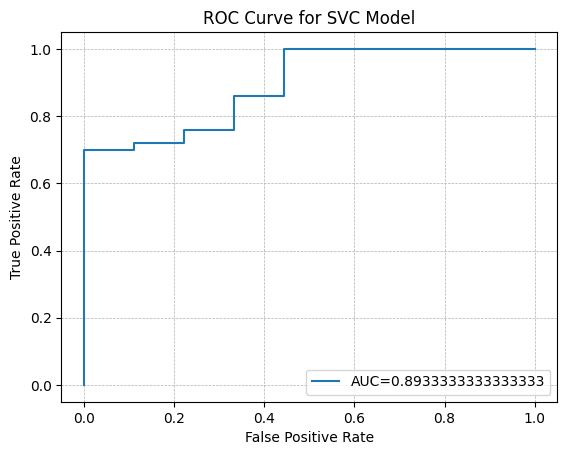

In [31]:
y_pred_proba1 = SVCModel.predict_proba(x_test1)[::,1]
fpr, tpr, _   = metrics.roc_curve(y_test1,  y_pred_proba1)
auc           = metrics.roc_auc_score(y_test1, y_pred_proba1)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title ('ROC Curve for SVC Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

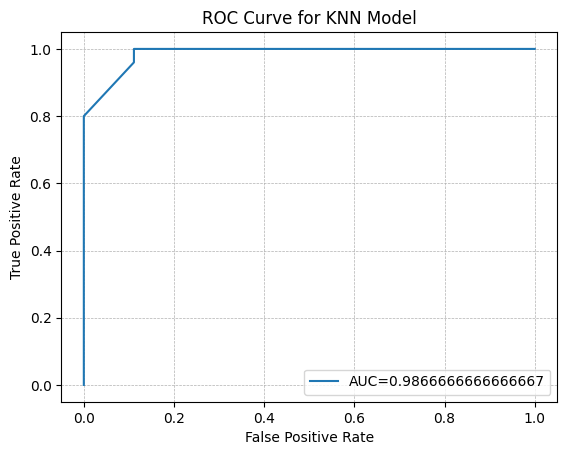

In [32]:
y_pred_proba2 = KNNModel.predict_proba(x_test2)[::,1]
fpr, tpr, _   = metrics.roc_curve(y_test2,  y_pred_proba2)
auc2          = metrics.roc_auc_score(y_test2, y_pred_proba2)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc2))

plt.title ('ROC Curve for KNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

In [33]:
y_pred_proba3 = LRModel.predict_proba(x_test3)[::,1]
fpr, tpr, _   = metrics.roc_curve(y_test3,  y_pred_proba3)
auc3          = metrics.roc_auc_score(y_test3, y_pred_proba3)

#create ROC curve
plt.plot(fpr,tpr,label=f"AUC={str(auc3)}")

plt.title ('ROC Curve for Decision Tree Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend()


plt.show()

## Confusion Matrix

In [34]:
#Import Libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns

Logistic Regression


<AxesSubplot: >

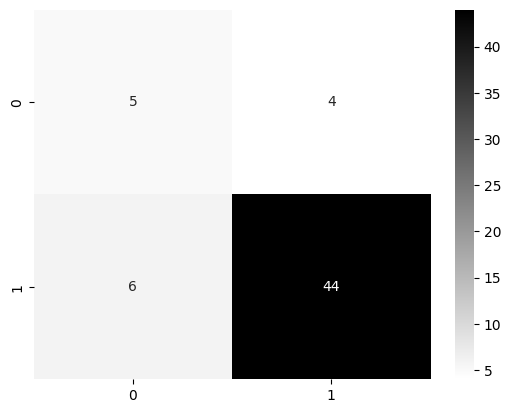

In [35]:
print("Logistic Regression")

CM = confusion_matrix(y_test,y_pred) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'

In [36]:
print("SVC")

CM = confusion_matrix(y_test1,y_pred1) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'

SVC


<AxesSubplot: >

In [37]:
print("KNN")

CM = confusion_matrix(y_test2,y_pred2) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'

KNN


<AxesSubplot: >

Decision Tree


<AxesSubplot: >

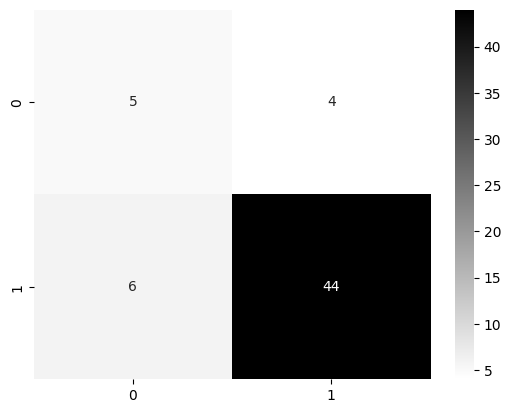

In [38]:
print("Decision Tree")

CM = confusion_matrix(y_test3,y_pred3) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'

# Save Models

In [39]:
# dump(LRModel, 'LogisticRegression.joblib')
# dump(SVCModel,'SupporVectorClassification.joblib')
# dump(KNNModel,'k-NearestNeighbor.joblib')
# dump(DTModel,'DecisionTree.joblib')

# END